In [40]:
import os
import zipfile
import urllib.request
import json

In [41]:
import kaggle

# Authenticate using kaggle.json
kaggle.api.authenticate()

# List available datasets (example)
datasets = kaggle.api.dataset_list()
print("Kaggle API is working! Found", len(datasets), "datasets.")

Kaggle API is working! Found 20 datasets.


In [42]:
from kaggle.api.kaggle_api_extended import KaggleApi
import os
import zipfile

CALIFORNIA_PATH = r"D:/Sumon/Coding/Datasets"

def fetch_california_data():
    api = KaggleApi()
    api.authenticate()

    os.makedirs(CALIFORNIA_PATH, exist_ok=True)

    print("Downloading dataset...")
    api.dataset_download_files("dhirajnirne/california-housing-data", path=CALIFORNIA_PATH, unzip=True)

    print(f"Dataset downloaded and extracted to {CALIFORNIA_PATH}")

fetch_california_data()

Dataset URL: https://www.kaggle.com/datasets/dhirajnirne/california-housing-data
Dataset downloaded and extracted to D:/Sumon/Coding/Datasets


In [43]:
import pandas as pd
def load_california_data(california_path=CALIFORNIA_PATH):
    CALIFORNIA_PATH = os.path.join(california_path,"housing.csv")
    return pd.read_csv(CALIFORNIA_PATH)

In [44]:
housing = load_california_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [45]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

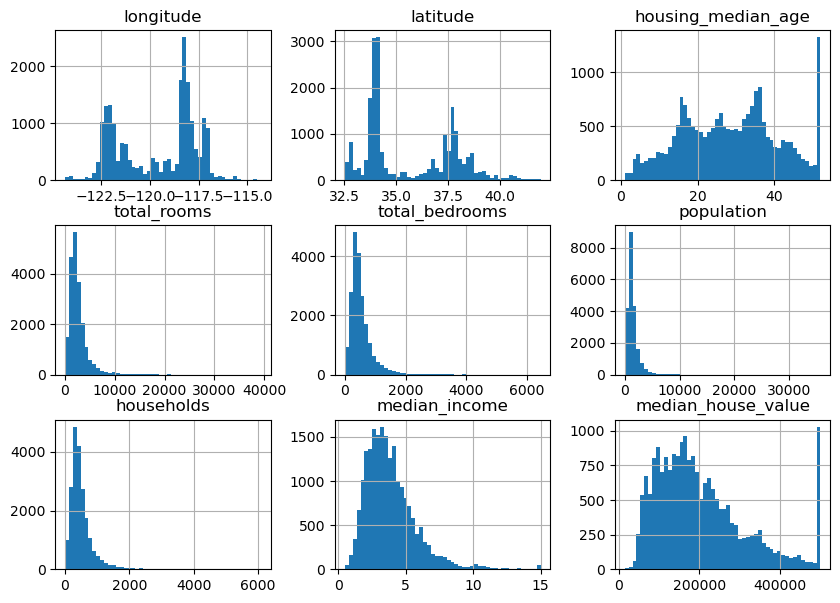

In [46]:
housing.hist(bins=50, figsize=(10,7))

In [47]:
housing["location_hash"]=housing.apply(lambda x: hash((x["latitude"],x["longitude"])) % (10**9) , axis=1)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,location_hash
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,875906134
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,759576169
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,226352296
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,388291753
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,388291753


In [48]:
housing=housing.set_index("location_hash")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
location_hash,,,,,,,,,,
875906134,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
759576169,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
226352296,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
388291753,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
388291753,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [49]:
housing.drop(columns=["longitude","latitude"], axis=1, inplace=True)
housing.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
location_hash,,,,,,,,
875906134,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
759576169,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
226352296,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
388291753,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
388291753,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [50]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(housing, test_size=0.2, random_state=42)

In [68]:
from scipy import stats

numerical_features = housing.select_dtypes(include=['float64', 'int64']).columns

z_scores = stats.zscore(train[numerical_features])
threshold = 3

train = train[(abs(z_scores) < threshold).all(axis=1)] 

In [69]:
housing.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [70]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [71]:
categorical_feature = housing.select_dtypes(include=["object"]).columns

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numerical_transformer = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("imputer", SimpleImputer(strategy="median")),
])

categorical_transformer = Pipeline(steps=[
    ("ohe", OneHotEncoder(handle_unknown="ignore")),
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_feature),
    ]
)

In [73]:
X_train = train.drop(columns=['median_house_value'],axis=1)  # Drop target column from training data
y_train = train['median_house_value']  # Target for training

X_test = test.drop(columns=['median_house_value'],axis=1)  # Drop target column from test data
y_test = test['median_house_value']  # Target for test data

In [74]:
X_train_transformed = preprocessor.fit_transform(train)
X_test_transformed = preprocessor.transform(test)

In [75]:
X_train.dtypes

housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
dtype: object

In [77]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train_transformed, y_train)

LinearRegression()

In [79]:
from sklearn.model_selection import cross_val_score
reg_score = cross_val_score(reg, X_train_transformed, y_train, cv=10)
reg_score.mean()

1.0

In [80]:
train_score = reg.score(X_train_transformed,y_train)
train_score

1.0

In [81]:
y_pred = reg.predict(X_test_transformed)

In [83]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mse


9.929860808255174e-21

In [85]:
r2 = r2_score(y_test, y_pred)
r2

1.0

In [88]:
from sklearn.model_selection import cross_val_score
reg_score_2 = cross_val_score(reg, X_test_transformed, y_test, cv=10)
reg_score_2.mean()

1.0

In [90]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"The MSE score is on test data {mse}")
print(f"The R2-Score is on test data {r2}")

The MSE score is on test data 9.929860808255174e-21
The R2-Score is on test data 1.0
